In [90]:
import pandas as pd
import seaborn as sbn

df = pd.read_csv('influencers.csv')
print(df.to_string())

     Rank              Channel Info  Influence Score Followers Avg. Likes  Posts  60-Day Eng Rate New Post Avg. Likes Total Likes       Country Or Region
0       1               \ncristiano               92    485.2m       8.7m   3.4k            0.013                6.3m       29.1b                   Spain
1       2               kyliejenner               91    370.7m       8.2m   7.0k            0.014                5.0m       57.4b           United States
2       3                \nleomessi               90    363.9m       6.7m    915            0.010                3.5m        6.1b                     NaN
3       4             \nselenagomez               93    348.8m       6.1m   1.9k            0.005                1.7m       11.4b           United States
4       5                 \ntherock               91    339.4m       1.8m   6.8k            0.003              932.0k       12.6b           United States
5       6            \narianagrande               92    333.0m       3.7m   

In [91]:
df.isnull().values.any()
df.dropna(inplace = True)
df.isnull().values.any()

False

In [92]:
df.drop(['Rank','Channel Info','60-Day Eng Rate','New Post Avg. Likes','Country Or Region'],axis=1,inplace=True)
print(df.to_string())

     Influence Score Followers Avg. Likes  Posts Total Likes
0                 92    485.2m       8.7m   3.4k       29.1b
1                 91    370.7m       8.2m   7.0k       57.4b
3                 93    348.8m       6.1m   1.9k       11.4b
4                 91    339.4m       1.8m   6.8k       12.6b
5                 92    333.0m       3.7m   5.0k       18.5b
6                 91    330.7m       3.5m   5.7k       19.8b
7                 92    276.1m       3.6m   2.0k        7.3b
8                 89    273.9m       2.4m   4.1k        9.8b
9                 91    260.0m       1.9m   7.4k       14.0b
10                90    258.9m       5.5m    671        3.7b
11                91    241.1m     298.9k  10.0k        3.0b
12                90    239.2m     316.0k    973      307.5m
13                91    226.1m       2.4m    542        1.3b
14                89    223.1m       1.7m   3.2k        5.3b
16                90    202.7m       2.0m   6.4k       12.9b
17                89    

In [101]:
df["Followers"] = df["Followers"].replace({"k":"*1e3", "m":"*1e6", "b":"*1e9"}, regex=True).map(pd.eval).astype(int)
df["Avg. Likes"] = df["Avg. Likes"].replace({"k":"*1e3", "m":"*1e6", "b":"*1e9"}, regex=True).map(pd.eval).astype(int)
df["Posts"] = df["Posts"].replace({"k":"*1e3", "m":"*1e6", "b":"*1e9"}, regex=True).map(pd.eval).astype(int)
df["Total Likes"] = df["Total Likes"].replace({"k":"*1e3", "m":"*1e6", "b":"*1e9"}, regex=True).map(pd.eval).astype("int64")


In [102]:
print(df.to_string())

     Influence Score  Followers  Avg. Likes  Posts  Total Likes
0                 92  485200000     8700000   3400  29100000000
1                 91  370700000     8199999   7000  57400000000
3                 93  348800000     6100000   1900  11400000000
4                 91  339400000     1800000   6800  12600000000
5                 92  333000000     3700000   5000  18500000000
6                 91  330700000     3500000   5700  19800000000
7                 92  276100000     3600000   2000   7300000000
8                 89  273900000     2400000   4100   9800000000
9                 91  260000000     1900000   7400  14000000000
10                90  258899999     5500000    671   3700000000
11                91  241100000      298900  10000   3000000000
12                90  239200000      316000    973    307500000
13                91  226100000     2400000    542   1300000000
14                89  223100000     1700000   3200   5300000000
16                90  202700000     2000

In [108]:
print(df['Followers'].describe())

count    1.370000e+02
mean     8.520146e+07
std      8.258396e+07
min      3.340000e+07
25%      4.180000e+07
50%      5.330000e+07
75%      7.140000e+07
max      4.852000e+08
Name: Followers, dtype: float64


In [109]:
print(df['Influence Score'].describe())

count    137.000000
mean      81.678832
std        8.747213
min       41.000000
25%       80.000000
50%       83.000000
75%       86.000000
max       93.000000
Name: Influence Score, dtype: float64


In [110]:
print(df['Avg. Likes'].describe())

count    1.370000e+02
mean     1.488024e+06
std      1.538354e+06
min      6.350000e+04
25%      4.127000e+05
50%      1.000000e+06
75%      1.800000e+06
max      8.700000e+06
Name: Avg. Likes, dtype: float64


In [111]:
print(df["Posts"].describe())

count      137.000000
mean      3986.094891
std       3391.164267
min         35.000000
25%       1400.000000
50%       3000.000000
75%       6300.000000
max      16900.000000
Name: Posts, dtype: float64


In [113]:
print(df["Total Likes"].describe())

count    1.370000e+02
mean     4.267624e+09
std      6.475512e+09
min      2.280000e+07
25%      1.400000e+09
50%      2.400000e+09
75%      4.400000e+09
max      5.740000e+10
Name: Total Likes, dtype: float64


,Influence Score,Followers,Avg. Likes,Posts,Total Likes
Influence Score,1.000000,0.442241,0.208166,0.174080,0.295035
Followers,0.442241,1.000000,0.607207,0.057784,0.693586
Avg. Likes,0.208166,0.607207,1.000000,-0.321193,0.669669
Posts,0.174080,0.057784,-0.321193,1.000000,0.194077
Total Likes,0.295035,0.693586,0.669669,0.194077,1.000000


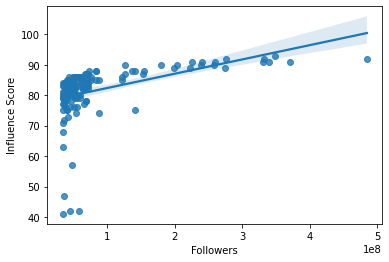

In [122]:
sbn.regplot(x = df['Followers'] , y = df['Influence Score'])
df.corr()

<AxesSubplot:xlabel='Avg. Likes', ylabel='Influence Score'>

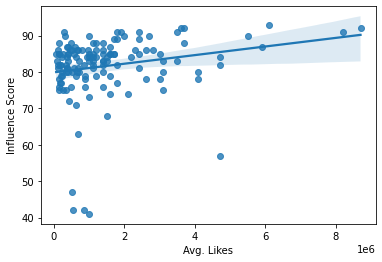

In [124]:
sbn.regplot(x = df['Avg. Likes'] , y = df['Influence Score'])

<AxesSubplot:xlabel='Total Likes', ylabel='Influence Score'>

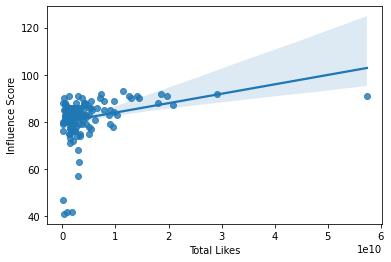

In [119]:
sbn.regplot(x = df['Total Likes'] , y = df['Influence Score'])

<AxesSubplot:xlabel='Posts', ylabel='Influence Score'>

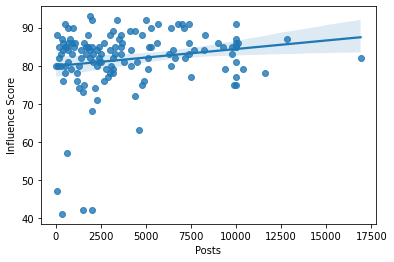

In [120]:
sbn.regplot(x = df['Posts'] , y = df['Influence Score'])